# Question 1a :  Draw f (x). 

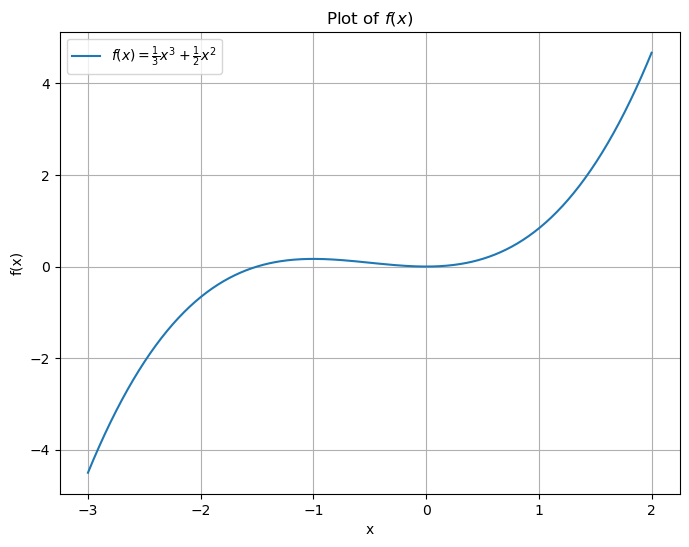

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
x = np.linspace(-3, 2, 400)  # Range to capture key features
f_x = (1/3) * x**3 + (1/2) * x**2

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x, f_x, label='$f(x) = \\frac{1}{3}x^3 + \\frac{1}{2}x^2$', color='#1f77b4')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f(x)$')
plt.grid(True)
plt.legend()
plt.show()

# Question 1B Optimization paths on f(x)

Alpha: 0.001
Converged: False
Final x: 0.225126
Final f: 0.029144
Iters: 1000
Last |grad|: 0.276208
---
Alpha: 0.01
Converged: False
Final x: 0.000021
Final f: 0.000000
Iters: 1000
Last |grad|: 0.000022
---
Alpha: 0.1
Converged: True
Final x: 0.000001
Final f: 0.000000
Iters: 125
Last |grad|: 0.000001
---
Alpha: 1.0
Converged: True
Final x: -1.000000
Final f: 0.166667
Iters: 2
Last |grad|: 0.000000
---


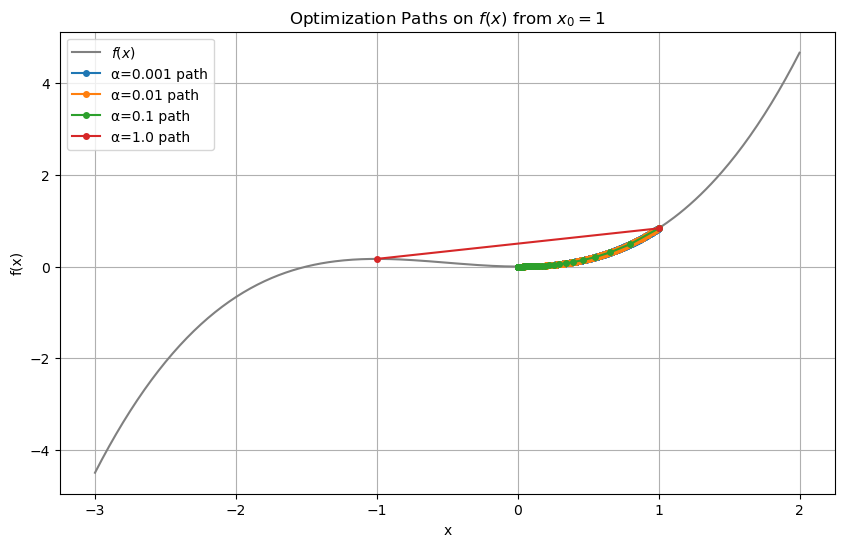

In [37]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return (1/3) * x**3 + (1/2) * x**2

# Function to run Gradient Descent for a given alpha
def run_gd(alpha, x0=1.0, max_iters=1000, tol=1e-6):
    # Initialize x as a PyTorch tensor with gradients enabled
    x = torch.tensor(x0, requires_grad=True)
    
    # Track history for plotting
    history_x = [x.item()]  # List of x values over iterations
    history_f = [f(x).item()]  # List of f(x) values
    
    iters = 0
    converged = False
    last_grad = 0.0
    
    for i in range(max_iters):
        iters += 1
        
        # Compute loss and gradient
        loss = f(x)
        loss.backward()
        grad = x.grad.item()  # Get the gradient (f'(x))
        
        # Update last_grad before checking convergence (fixed for accuracy)
        last_grad = abs(grad)
        
        # Check convergence: If |grad| is tiny, stop
        if last_grad < tol:
            converged = True
            break
        
        # Update x: x = x - alpha * grad (no grad tracking during update)
        with torch.no_grad():
            x -= alpha * grad
        
        # Zero out the gradient for next iteration
        x.grad.zero_()
        
        # Append to history (after update)
        history_x.append(x.item())
        history_f.append(f(x).item())
    
    # Return results as a dictionary
    return {
        'alpha': alpha,
        'converged': converged,
        'final_x': history_x[-1],
        'final_f': history_f[-1],
        'iters': iters,
        'last_grad': last_grad,
        'history_x': history_x,
        'history_f': history_f
    }

# Run GD for each learning rate
alphas = [0.001, 0.01, 0.1, 1.0]
results = {alpha: run_gd(alpha) for alpha in alphas}

# Print results for quick inspection
for alpha, res in results.items():
    print(f"Alpha: {alpha}")
    print(f"Converged: {res['converged']}")
    print(f"Final x: {res['final_x']:.6f}")
    print(f"Final f: {res['final_f']:.6f}")
    print(f"Iters: {res['iters']}")
    print(f"Last |grad|: {res['last_grad']:.6f}")
    print("---")


# Plot 2: Optimization paths on f(x)
x_range = np.linspace(-3, 2, 400)  # Range to plot f(x)
f_range = (1/3) * x_range**3 + (1/2) * x_range**2
plt.figure(figsize=(10, 6))
plt.plot(x_range, f_range, label='$f(x)$', color='gray')
for alpha, res in results.items():
    plt.plot(res['history_x'], res['history_f'], 'o-', label=f'α={alpha} path', markersize=4)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Optimization Paths on $f(x)$ from $x_0=1$')
plt.legend()
plt.grid(True)
plt.show()

# Question 1B Gradient Descent converge

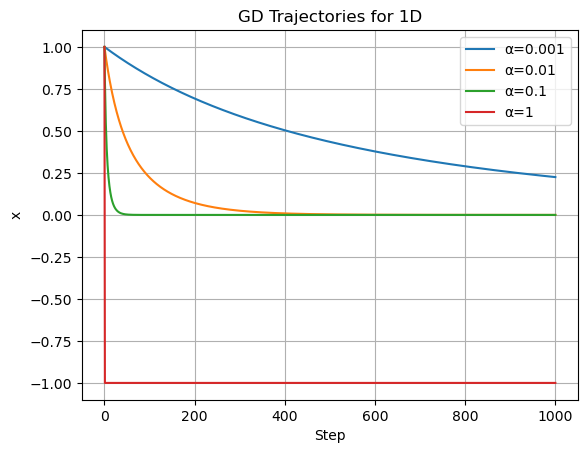

In [29]:
import torch
import matplotlib.pyplot as plt

# Set initial x0, make it require gradients
def run_gd_1d(x0, lr, steps=1000):
    x = torch.tensor(x0, dtype=torch.float32, requires_grad=True)
    history = [x.item()]

    for i in range(steps):
        y = (1/3)*x**3 + (1/2)*x**2  # f(x)
        y.backward()                 # Compute df/dx
        with torch.no_grad():
            x -= lr * x.grad         # Gradient step
        x.grad.zero_()
        history.append(x.item())

    return history

alphas = [0.001, 0.01, 0.1, 1]
plt.figure()
for lr in alphas:
    hist = run_gd_1d(1.0, lr)
    plt.plot(hist, label=f'α={lr}')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('GD Trajectories for 1D')
plt.legend()
plt.grid(True)
plt.show()



# Question 2B radient Descent to minimize f.

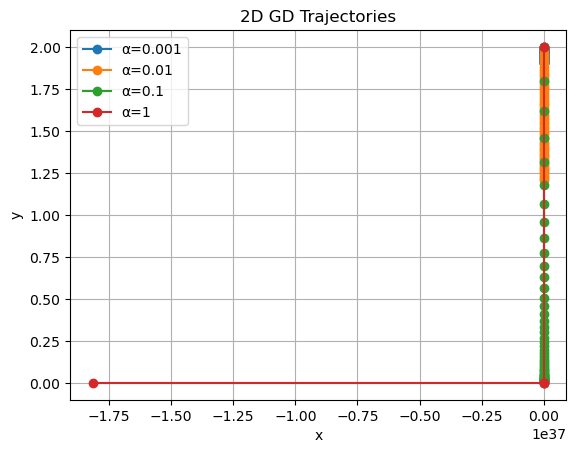

In [27]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def run_gd_2d(z0, lr, steps=50):
    z = torch.tensor(z0, dtype=torch.float32, requires_grad=True)
    history = [z.detach().numpy().copy()]

    for i in range(steps):
        x, y = z
        f = 0.25*x**4 + 0.5*y**2      # f(x, y)
        f.backward()
        with torch.no_grad():
            z -= lr * z.grad
        z.grad.zero_()
        history.append(z.detach().numpy().copy())

    return np.array(history)

alphas = [0.001, 0.01, 0.1, 1]
plt.figure()
for lr in alphas:
    hist = run_gd_2d([-3, 2], lr)
    plt.plot(hist[:, 0], hist[:, 1], marker='o', label=f'α={lr}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D GD Trajectories')
plt.legend()
plt.grid(True)
plt.show()
